### PPOL564 | Data Science 1: Foundations | 
#### Final Project code for analysis of Mexico and Guatemala data
####  Alvaro Altamirano Montoya

### I. Dependencies

In [223]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
#import missingno as miss

# Plotting libraries
import plotly.express as px
from plotly.offline import plot, init_notebook_mode, iplot
from plotnine import *
import matplotlib.pyplot as plt
%matplotlib inline

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# For model interpretation
from sklearn.inspection import (
    permutation_importance,
    partial_dependence, 
    PartialDependenceDisplay, 
    plot_partial_dependence
)

# Misc
import warnings
warnings.filterwarnings("ignore")


import math
from numpy import sqrt 
import os

# Set WD
path = r'C:\Users\unily\Documents\Georgetown\PPOL 564 - Intro to Data Science\project'
os.chdir(path)

### II. Loading and wrangling data

In [269]:
# Misc
import warnings
warnings.filterwarnings("ignore")
# Data Management/Investigation
import pandas as pd
# Plotting libraries
import plotly.express as px
from plotly.offline import plot, init_notebook_mode, iplot

df = pd.read_csv("data\df.csv")
df2= df[df['country']=='mx']
df = df[df['country']=='gt']
df.reset_index(drop=True, inplace=True)
#Create df of missing values by variable
df_merged_pctna = (df.isnull().sum() * 100 / len(df)).round(1).sort_values(ascending = False)
df.reset_index(drop=True, inplace=True)
#Create df of missing values by variable
df_merged_pctna2 = (df2.isnull().sum() * 100 / len(df2)).round(1).sort_values(ascending = False)

In [249]:
# Figure 2a. An overview of the relational datasets: Guatemala.
# create missing values' bar graph
fig = px.bar(df_merged_pctna, x=df_merged_pctna.index.values, y=df_merged_pctna,
             template="simple_white", text = df_merged_pctna,
             title= 'Figure 2a: Percent of missing values in Guatemala\'s dataset')
fig.update_layout(showlegend=False,
                xaxis_title="Variables",
                yaxis_title="Percent missing (%)",
                font_family="Arial",
                title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19,
                legend_title_font_color="green")
fig.update_traces(textposition='inside')
#### Display figure
#### Save figure
fig.write_image("assets/fig2a.png", width=800, height=650)
iplot(fig)

# 2B
# Figure 2b. An overview of the relational datasets: Mexico.
# create missing values' bar graph
fig = px.bar(df_merged_pctna2, x=df_merged_pctna2.index.values, y=df_merged_pctna2,
             template="simple_white", text = df_merged_pctna2,
             title= 'Figure 2b: Percent of missing values in Mexico\'s dataset')
fig.update_layout(showlegend=False,
                xaxis_title="Variables",
                yaxis_title="Percent missing (%)",
                font_family="Arial",
                title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19,
                legend_title_font_color="green")
fig.update_traces(textposition='inside')
#### Display figure
#### Save figure
fig.write_image("assets/fig2b.png", width=800, height=650)

iplot(fig)

In [274]:
# 3a, Guatemala 
df4 = df.groupby([df.date_posted])['count'].\
            sum().reset_index()
df4['conteo_MA'] = df4['count'].transform(lambda x: x.rolling(7, 1).mean()) 

df4 = df4.loc[pd.to_datetime(df4.date_posted).dt.year>2019]
#Create Figure
fig3a = px.line(df4, x='date_posted', y='conteo_MA', 
                  title = 'Figure 3a. Weekly new vacancies for Guatemala',
               template ='simple_white'
                 )
fig3a.update_layout(showlegend=False,
                xaxis_title="Date (weeks in ISO 8601)",
                yaxis_title="New downloaded vacancies",
                font_family="Arial",
                title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19,
                legend_title_font_color="green",
                uniformtext_minsize=14, 
                uniformtext_mode=False)
fig3a.update_traces(textposition='middle right')
fig3a.update_xaxes(showline=True, linewidth=2, linecolor='black', showspikes=True)
fig3a.update_yaxes(showline=True, linewidth=2, linecolor='black', showspikes=True)

#### Display figure
#### Save figure
fig3a.write_image("assets/fig3a.png", width=800, height=650)

iplot(fig3a)

# 3b, Mexico
df3 = df2.groupby([df2.date_posted])['count'].\
            sum().reset_index()
df3['conteo_MA'] = df3['count'].transform(lambda x: x.rolling(7, 1).mean()) 

df3 = df3.loc[pd.to_datetime(df3.date_posted).dt.year>2019]
#Create Figure
fig3b = px.line(df3, x='date_posted', y='conteo_MA', 
                  title = 'Figure 3b. Weekly new vacancies for Mexico',
               template ='simple_white'
                 )
fig3b.update_layout(showlegend=False,
                xaxis_title="Date (weeks in ISO 8601)",
                yaxis_title="New downloaded vacancies",
                font_family="Arial",
                title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19,
                legend_title_font_color="green",
                uniformtext_minsize=14, 
                uniformtext_mode=False)
fig3b.update_traces(textposition='middle right')
fig3b.update_xaxes(showline=True, linewidth=2, linecolor='black', showspikes=True)
fig3b.update_yaxes(showline=True, linewidth=2, linecolor='black', showspikes=True)

#### Display figure
#### Save figure
fig3b.write_image("assets/fig3b.png", width=800, height=650)

iplot(fig3b)

### Data wrangling, transformations, and ML preparations (Mexico)

In [ ]:
df = pd.read_csv("data\df.csv")[0:200000]
df= df[df['country']=='mx']
df.reset_index(drop=True, inplace=True)

#Trimming outliers from dependent variable and other independent continous variables
#And 
# Fill numeric columns with the mean
num_vars = df[['salary','experience']]
for col in num_vars:
    df['std'] = df[col].std()
    df['mean'] = df[col].mean()
    df[col].fillna((df[col].mean()), inplace=True)
    df = df[~(np.abs(df[col]-df['mean']) > (2*df['std']))]

#Filling age's missing values with the average
df.age.fillna((df.age.mean()), inplace=True)
#Trimming wages below minimum wage
df= df[df.salary >600]

# Final split test/train for Machine Learning Pipelines
y = np.log(df['salary'] + 100).astype('float')
X = df.drop(columns=['salary', 'id','count', 'date', 'city','week','date_posted', 'country', 'title', 'firm', 'knowledge', 'languages', 'mean', 'std'])
# Convert all categorical variables in the data to numeric values
for col in X.select_dtypes(include=['object']).copy():
    print(col)
    X[col] = X[col].astype('category')
    X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)    
    
# Train/test split   
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=747)

In [ ]:
### Machine Learning Battery

In [ ]:
search_space = [
    
    # Lasso, 0
    {'model': [linear_model.Lasso()]},
    
    # Linear, 6
    {'model': [LinearRegression()]},
    
    # Elastic Net, 0
    {'model': [ElasticNet()]},
    
    # Bayesian Ridge, 6
    {'model': [BayesianRidge()]},
    
    # LGM, 19
    {'model': [LGBMRegressor()],
    'model__max_depth':[2,3, 4],
    'model__n_estimators':[500,1000, 1500],
    'model__max_features':['sqrt']},
    
    # Gradient Boost, 11
    {'model': [GradientBoostingRegressor()],
    'model__max_depth':[2,3, 4],
    'model__n_estimators':[500,1000],
    'model__max_features':['sqrt']},
    
    # SVR, 10
    {'model': [SVR()]},
    
    # XGB
    {'model': [XGBRegressor()]},
    
    # Cat
    {'model': [CatBoostRegressor()]},
    
    # SGDR
    {'model': [SGDRegressor()]},
    
    # Kernel ridge
    {'model': [KernelRidge()]}

]


# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=1234)

# Generate pipeline object
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

#Create grid-search object
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_absolute_error',
                      n_jobs=-1)

# Fit search pipeline using train data
search.fit(train_X,train_y)
rf_mod = search.best_estimator_
rf_mod

### Printing the best model fit's results

In [ ]:
print(" Results from Grid Search: " )
print("\n The best estimator across ALL searched params:\n",search.best_estimator_)
print("\n The best score across ALL searched params:\n",search.best_score_)
print("\n The best parameters across ALL searched params:\n",search.best_params_)
# R_squared and Root Mean Squared Error on train and test data
print('R_squared on train data: ', m.r2_score(train_y,rf_mod.predict(train_X)))
print('R_squared on test data: ', m.r2_score(test_y,rf_mod.predict(test_X)))
print('RMSE on train data: ', m.mean_squared_error(train_y,rf_mod.predict(train_X))**(0.5))
print('RMSE on test data: ',  m.mean_squared_error(test_y,rf_mod.predict(test_X))**(0.5))

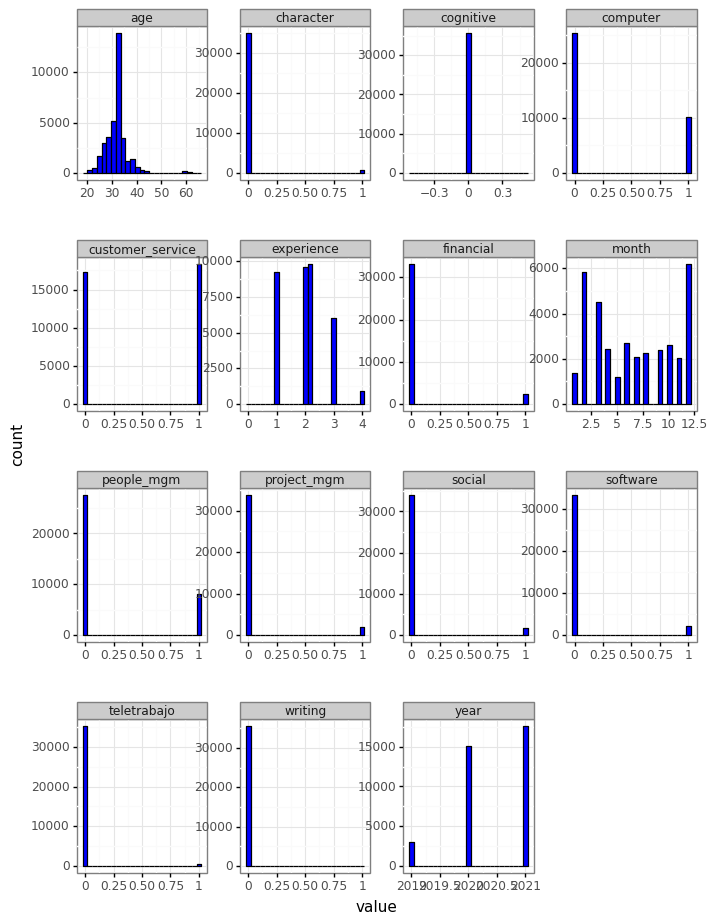

<ggplot: (-9223371875729021812)>

In [172]:
# Plot the continuous Variables 
temp1 = train_X.select_dtypes(include=["int64","float64"]).melt()
(
    ggplot(temp1,aes(x="value")) +
    geom_histogram(bins=25, color ="black", fill="blue") +
    facet_wrap("variable",scales='free') +
    theme_bw()+
    theme(figure_size=(8,11),
          subplots_adjust={'wspace':0.25, 'hspace':0.5})
)

In [218]:
print(" Results from Grid Search: " )
print("\n The best estimator across ALL searched params:\n",search.best_estimator_)
print("\n The best score across ALL searched params:\n",search.best_score_)
print("\n The best parameters across ALL searched params:\n",search.best_params_)
# R_squared and Root Mean Squared Error on train and test data
print('R_squared on train data: ', m.r2_score(train_y,rf_mod.predict(train_X)))
print('R_squared on test data: ', m.r2_score(test_y,rf_mod.predict(test_X)))
print('RMSE on train data: ', m.mean_squared_error(train_y,rf_mod.predict(train_X))**(0.5))
print('RMSE on test data: ',  m.mean_squared_error(test_y,rf_mod.predict(test_X))**(0.5))

 Results from Grid Search: 

 The best estimator across ALL searched params:
 Pipeline(steps=[('pre_process', MinMaxScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_param

#### Regression fit graphs

In [219]:
import plotly.express as px

# regression
# plotly figure setup
fig=go.Figure()
fig.add_trace(go.Scatter(name='Fit & Observed ln(salaries)', x=rf_mod.predict(test_X), y=test_y, mode='markers'))
fig.add_trace(go.Scatter(name='Line of best fit', x=rf_mod.predict(test_X), y=rf_mod.predict(test_X), mode='lines'))

# plotly figure layout
fig.update_layout(template="simple_white",
                  title={'text': "Figure 5a. Mexico: Model's fitted/predicted values"},
                  barmode='overlay',
                 height=680,
                showlegend=False,
                xaxis_title="Predicted values", yaxis_title="Observed values",
                font_family="Arial", title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19, legend_title_font_color="black"
                 )

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
              marker_line_width=1.5, opacity=0.6)

fig.add_annotation(
    text="Source: Authors' elaboration.",
    xref="x domain", yref="y domain",x=0.01, y=-0.14,showarrow=False)
#### Display figure
#### Save figure
fig.write_image("assets/fig5B.png", width=800, height=650)

iplot(fig)

#### Permutation Analysis

In [220]:
# preparing permutation importance object
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=25)

In [221]:
# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

variable        vi       std  \
0                                                 age  0.159062  0.001309   
1                                          experience  0.114003  0.001134   
2        education_ educacion superior - licenciatura  0.113760  0.001066   
3                     education_ educacion secundaria  0.032585  0.000544   
4                                    customer_service  0.023396  0.000349   
5                                            computer  0.020959  0.000530   
6   education_ educacion media superior -bachiller...  0.017570  0.000430   
7                       education_ educacion primaria  0.016091  0.000399   
8                firm_size_MÃ¡s de 1,000 trabajadores  0.014864  0.000411   
9                                            software  0.014133  0.000342   
10                      firm_size_51-200 trabajadores  0.013827  0.000348   
11                                  gender_indistinto  0.013553  0.000358   
12                   firm_size_501-1,000 trabajadores  0.012425  0.000381   
13                     firm_size_201-500 trabajadores  0.012297  0.000254   
14                contract_type_Otro tipo de contrato  0.011574  0.000310   
15                                         people_mgm  0.011064  0.000186   
16                                             social  0.008591  0.000258   
17                                               year  0.008261  0.000233   
18                                              month  0.007984  0.000307   
19                       firm_size_11-50 trabajadores  0.007654  0.000188   
20                                          character  0.007035  0.000280   
21                                        project_mgm  0.006311  0.000222   
22  contract_type_Contrato para obra o tiempo dete...  0.006280  0.000250   
23       education_ educacion superior - especialidad  0.005867  0.000298   
24               contract_type_Contrato por temporada  0.005249  0.000185   
25                                          financial  0.004923  0.000175   
26    contract_type_Contrato por tiempo indeterminado  0.004132  0.000169   
27                                        teletrabajo  0.003622  0.000105   
28                                     gender_hombres  0.003410  0.000169   
29                                     gender_mujeres  0.003317  0.000167   
30  education_ educacion media superior - educacio...  0.003259  0.000138   
31                         contract_type_Medio tiempo  0.002118  0.000145   
32                      contract_type_Tiempo Completo  0.001582  0.000073   
33           education_ educacion superior - maestria  0.001359  0.000102   
34                                            writing  0.001097  0.000075   
35                            contract_type_Por Horas  0.000772  0.000088   
36                                 gender_indiferente  0.000248  0.000037   
37          education_ educacion superior - doctorado  0.000144  0.000036   
38                           contract_type_Desde casa  0.000098  0.000032   
39                                          cognitive  0.000000  0.000000   

         low      high  
0   0.156445  0.161679  
1   0.111734  0.116272  
2   0.111627  0.115892  
3   0.031497  0.033673  
4   0.022699  0.024093  
5   0.019900  0.022018  
6   0.016710  0.018430  
7   0.015293  0.016890  
8   0.014043  0.015685  
9   0.013450  0.014817  
10  0.013132  0.014523  
11  0.012838  0.014268  
12  0.011664  0.013187  
13  0.011788  0.012805  
14  0.010955  0.012193  
15  0.010692  0.011437  
16  0.008076  0.009107  
17  0.007795  0.008728  
18  0.007371  0.008597  
19  0.007278  0.008029  
20  0.006476  0.007595  
21  0.005868  0.006754  
22  0.005781  0.006780  
23  0.005271  0.006463  
24  0.004879  0.005619  
25  0.004574  0.005273  
26  0.003795  0.004469  
27  0.003413  0.003831  
28  0.003072  0.003748  
29  0.002983  0.003651  
30  0.002982  0.003535  
31  0.001827  0.002409  
32  0.001436  0.001727  
33  0.001155  0.001564  
34  0.000948

In [244]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Bar(
name='Control', x=vi_dat.variable, y=vi_dat.vi,
error_y=dict(type='data', array=vi_dat['std'])))

fig.update_layout(template="simple_white",
                  title={'text': "Figure 4b. Mexico: Variable importance"},
                  barmode='overlay',
                 height=780,
                showlegend=False,
                xaxis_title="Features (variables)", yaxis_title="Post-permutation importance metric",
                font_family="Arial", title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19, legend_title_font_color="black"
                 )

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
              marker_line_width=1.5, opacity=0.6)

#### Display figure
#### Save figure
fig.write_image("assets/fig4b.png", width=800, height=650)

iplot(fig)

### Data wrangling, transformations, and ML preparations (Guatemala)

In [ ]:
#Load the data
df = pd.read_csv("data\df.csv")
df= df[df['country']=='gt']
df.reset_index(drop=True, inplace=True)

#Trimming outliers from dependent variable and other independent continous variables
#And 
# Fill numeric columns with the mean
num_vars = df[['salary','experience']]
for col in num_vars:
    df['std'] = df[col].std()
    df['mean'] = df[col].mean()
    df[col].fillna((df[col].mean()), inplace=True)
    df = df[~(np.abs(df[col]-df['mean']) > (2*df['std']))]

#Filling age's missing values with the average
df.age.fillna((df.age.mean()), inplace=True)
#Trimming wages below minimum wage
df= df[df.salary >600]

# Final split test/train for Machine Learning Pipelines
y = np.log(df['salary'] + 100).astype('float')
X = df.drop(columns=['salary', 'id','count', 'date', 'city','week','date_posted', 'country', 'title', 'firm', 'knowledge', 'languages', 'mean', 'std'])
# Convert all categorical variables in the data to numeric values
for col in X.select_dtypes(include=['object']).copy():
    print(col)
    X[col] = X[col].astype('category')
    X = pd.concat([X.drop(col, axis=1), pd.get_dummies(X[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)    
    
# Train/test split   
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=747)

# Plot the continuous Variables 
temp1 = train_X.select_dtypes(include=["int64","float64"]).melt()
(
    ggplot(temp1,aes(x="value")) +
    geom_histogram(bins=25, color ="black", fill="blue") +
    facet_wrap("variable",scales='free') +
    theme_bw()+
    theme(figure_size=(8,11),
          subplots_adjust={'wspace':0.25, 'hspace':0.5})
)

### Machine Learning Battery

In [ ]:
search_space = [
    
    # Lasso, 0
    {'model': [linear_model.Lasso()]},
    
    # Linear, 6
    {'model': [LinearRegression()]},
    
    # Elastic Net, 0
    {'model': [ElasticNet()]},
    
    # Bayesian Ridge, 6
    {'model': [BayesianRidge()]},
    
    # LGM, 19
    {'model': [LGBMRegressor()],
    'model__max_depth':[2,3, 4],
    'model__n_estimators':[500,1000, 1500],
    'model__max_features':['sqrt']},
    
    # Gradient Boost, 11
    {'model': [GradientBoostingRegressor()],
    'model__max_depth':[2,3, 4],
    'model__n_estimators':[500,1000],
    'model__max_features':['sqrt']},
    
    # SVR, 10
    {'model': [SVR()]},
    
    # XGB
    {'model': [XGBRegressor()]},
    
    # Cat
    {'model': [CatBoostRegressor()]},
    
    # SGDR
    {'model': [SGDRegressor()]},
    
    # Kernel ridge
    {'model': [KernelRidge()]}

]


# Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=1234)

# Generate pipeline object
pipe = Pipeline(steps=[('pre_process', pp.MinMaxScaler()),('model',None)])

#Create grid-search object
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_absolute_error',
                      n_jobs=-1)

# Fit search pipeline using train data
search.fit(train_X,train_y)
rf_mod = search.best_estimator_
rf_mod

In [ ]:
### Printing the best model fit's results
print(" Results from Grid Search: " )
print("\n The best estimator across ALL searched params:\n",search.best_estimator_)
print("\n The best score across ALL searched params:\n",search.best_score_)
print("\n The best parameters across ALL searched params:\n",search.best_params_)
# R_squared and Root Mean Squared Error on train and test data
print('R_squared on train data: ', m.r2_score(train_y,rf_mod.predict(train_X)))
print('R_squared on test data: ', m.r2_score(test_y,rf_mod.predict(test_X)))
print('RMSE on train data: ', m.mean_squared_error(train_y,rf_mod.predict(train_X))**(0.5))
print('RMSE on test data: ',  m.mean_squared_error(test_y,rf_mod.predict(test_X))**(0.5))

#### Regression fit graphs

import plotly.express as px

# regression
# plotly figure setup
fig=go.Figure()
fig.add_trace(go.Scatter(name='Fit & Observed ln(salaries)', x=rf_mod.predict(test_X), y=test_y, mode='markers'))
fig.add_trace(go.Scatter(name='Line of best fit', x=rf_mod.predict(test_X), y=rf_mod.predict(test_X), mode='lines'))

# plotly figure layout
fig.update_layout(template="simple_white",
                  title={'text': "Figure 5a. Mexico: Model's fitted/predicted values"},
                  barmode='overlay',
                 height=680,
                showlegend=False,
                xaxis_title="Predicted values", yaxis_title="Observed values",
                font_family="Arial", title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19, legend_title_font_color="black"
                 )

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
              marker_line_width=1.5, opacity=0.6)

fig.add_annotation(
    text="Source: Authors' elaboration.",
    xref="x domain", yref="y domain",x=0.01, y=-0.14,showarrow=False)
#### Display figure
#### Save figure
fig.write_image("assets/fig5B.png", width=800, height=650)

iplot(fig)





#### Permutation Analysis

In [ ]:
# preparing permutation importance object
vi = permutation_importance(rf_mod,train_X,train_y,n_repeats=25)

# Organize as a data frame 
vi_dat = pd.DataFrame(dict(variable=train_X.columns,
                           vi = vi['importances_mean'],
                           std = vi['importances_std']))

# Generate intervals
vi_dat['low'] = vi_dat['vi'] - 2*vi_dat['std']
vi_dat['high'] = vi_dat['vi'] + 2*vi_dat['std']

# But in order from most to least important
vi_dat = vi_dat.sort_values(by="vi",ascending=False).reset_index(drop=True)


vi_dat

import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Bar(
name='Control', x=vi_dat.variable, y=vi_dat.vi,
error_y=dict(type='data', array=vi_dat['std'])))

fig.update_layout(template="simple_white",
                  title={'text': "Figure 4b. Mexico: Variable importance"},
                  barmode='overlay',
                 height=780,
                showlegend=False,
                xaxis_title="Features (variables)", yaxis_title="Post-permutation importance metric",
                font_family="Arial", title_font_family="Arial Black",
                yaxis_title_font_family ="Arial Black",
                xaxis_title_font_family ="Arial Black",
                title_font_color="black",
                title_font_size=19, legend_title_font_color="black"
                 )

fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
              marker_line_width=1.5, opacity=0.6)

#### Display figure
#### Save figure
fig.write_image("assets/fig4b.png", width=800, height=650)

iplot(fig)